In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.graformer.lit_graformer import LitGraformer as LitModel
from modules.experiments.dataset import (
    construct_synthetic_cabin_ir, synthetic_cabin_ir_dataset_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoint = 'A_Pillar_Codriver'

constructed_loader = construct_synthetic_cabin_ir(
    dataset_root_path=synthetic_cabin_ir_dataset_root_path,
    viewpoint=viewpoint
)
saved_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    trained_dataset_name=constructed_loader['dataset_name'],
    trained_datasubset_name=constructed_loader['datasubset_name'],
)
experiment = Experiment(
    LitModel=LitModel,
    constructed_loader=constructed_loader,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup(
    trainer_config=dict(max_epoch=5)
)
experiment.train()

Global seed set to 1234
/workspace/modules/lifter_2d_3d/model/graformer/lit_graformer.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adj = torch.tensor(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 37499 val_dataset 6250 test_dataset 6251
train_dataset 37499 val_dataset 6250 test_dataset 6251


Missing logger folder: saved_lifter_2d_3d_model/LitGraformer/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | GraFormer | 926 K 
------------------------------------
926 K     Trainable params
0         Non-trainable params
926 K     Total params
3.708     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2220.4997539520264


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


check #1
training loss from 2925 batches: 67.19097579518954
val MPJPE from: 6208 samples : 39.375606924295425


In [2]:
experiment.test()
experiment.print_result()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/LitGraformer/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=4-step=2925.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/LitGraformer/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=4-step=2925.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     43.27109083533287     │
└───────────────────────────┴───────────────────────────┘

MPJPE = 43.27109083533287
PJPE =
                     PJPE
nose            26.708378
left_eye        28.299063
right_eye       29.845140
left_ear        26.433224
right_ear       24.197100
left_shoulder   22.570827
right_shoulder  26.221901
left_elbow      88.075996
right_elbow     78.753601
left_wrist      57.351086
right_wrist     56.398197
left_hip        51.608185
right_hip       46.061386


## Train Samples

estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])


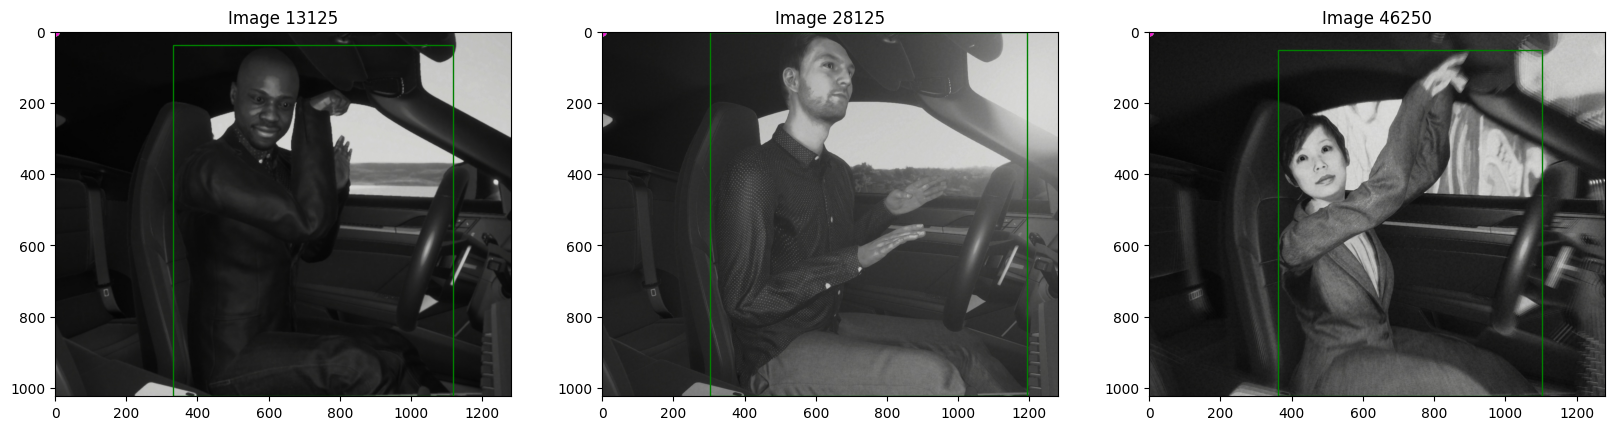

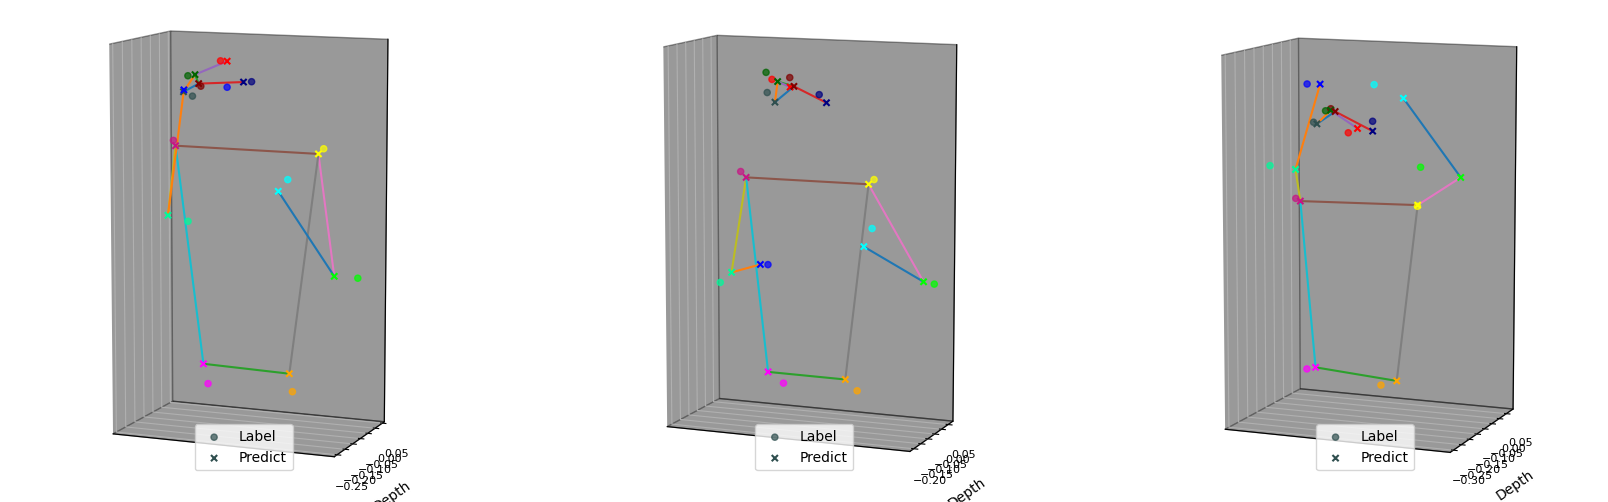

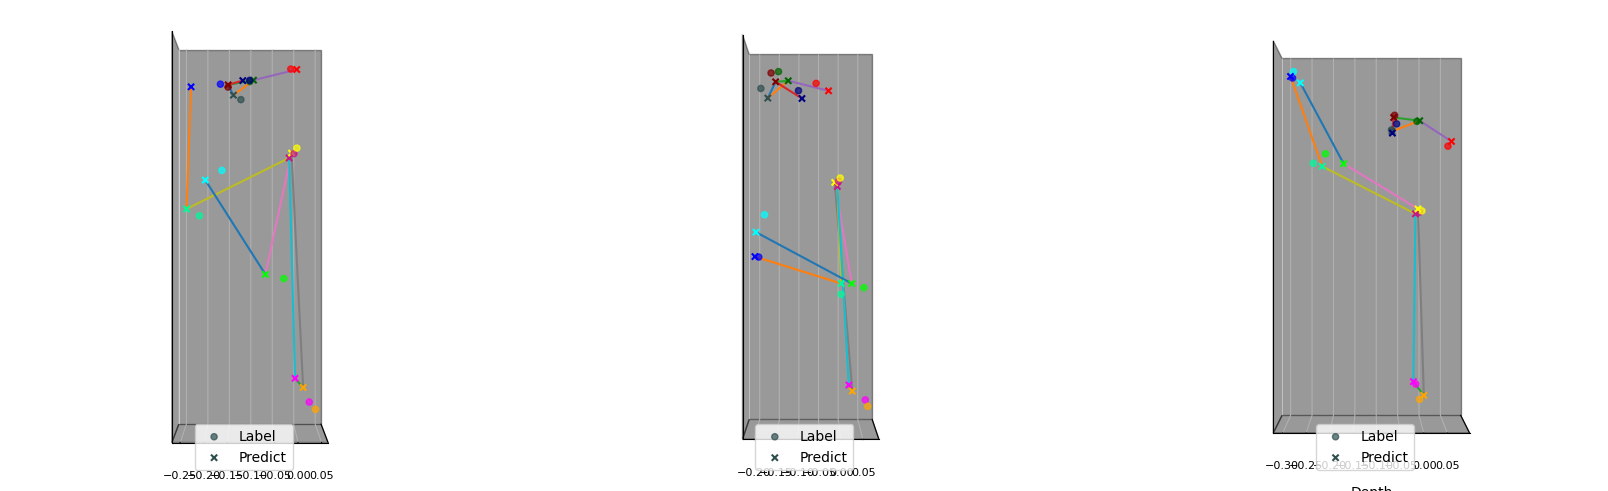

In [3]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path

dataset_length = len(experiment.train_loader.dataset)
plot_samples(
    Path(synthetic_cabin_ir_dataset_root_path)/ viewpoint,
    experiment.lit_model,
    experiment.train_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)

## Test Samples

estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])


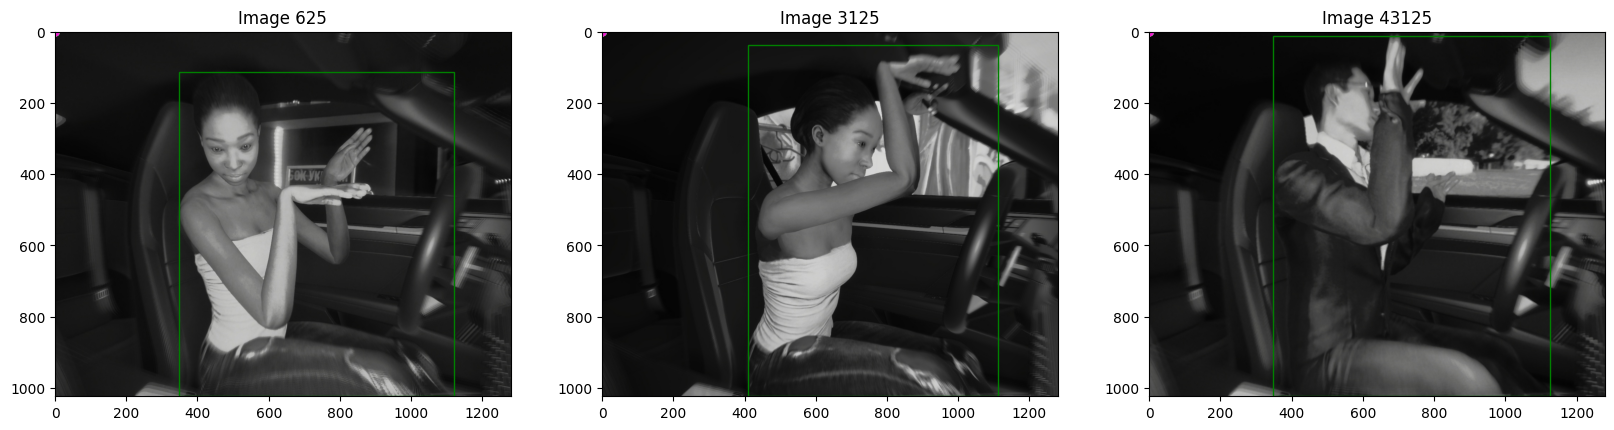

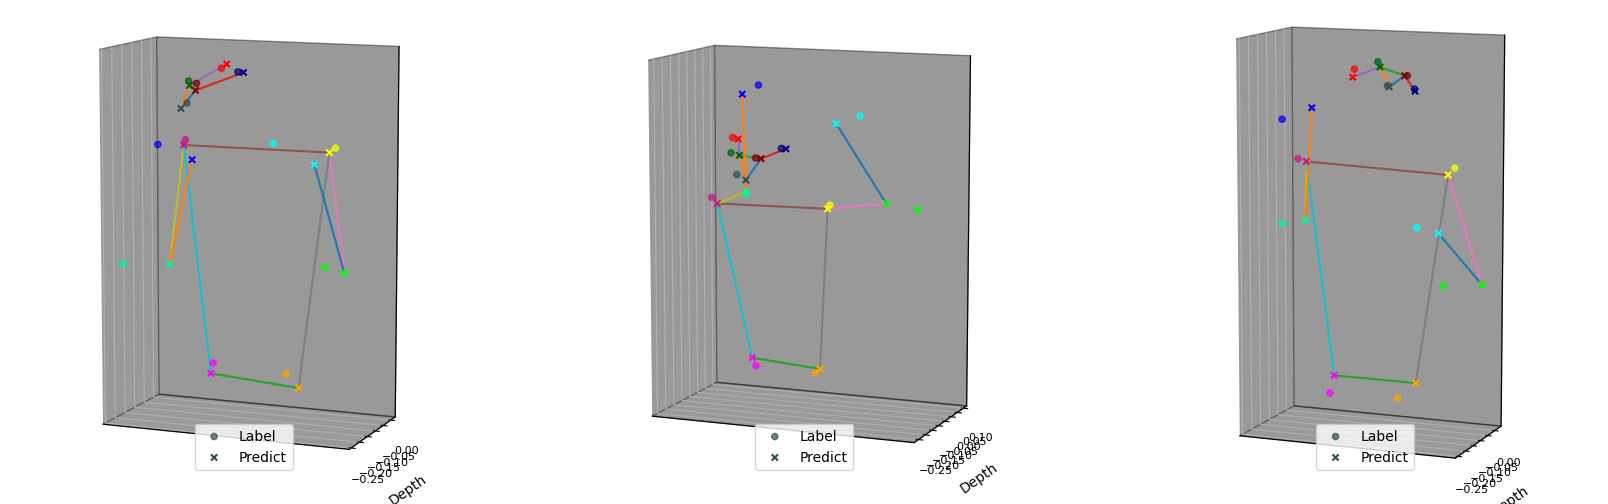

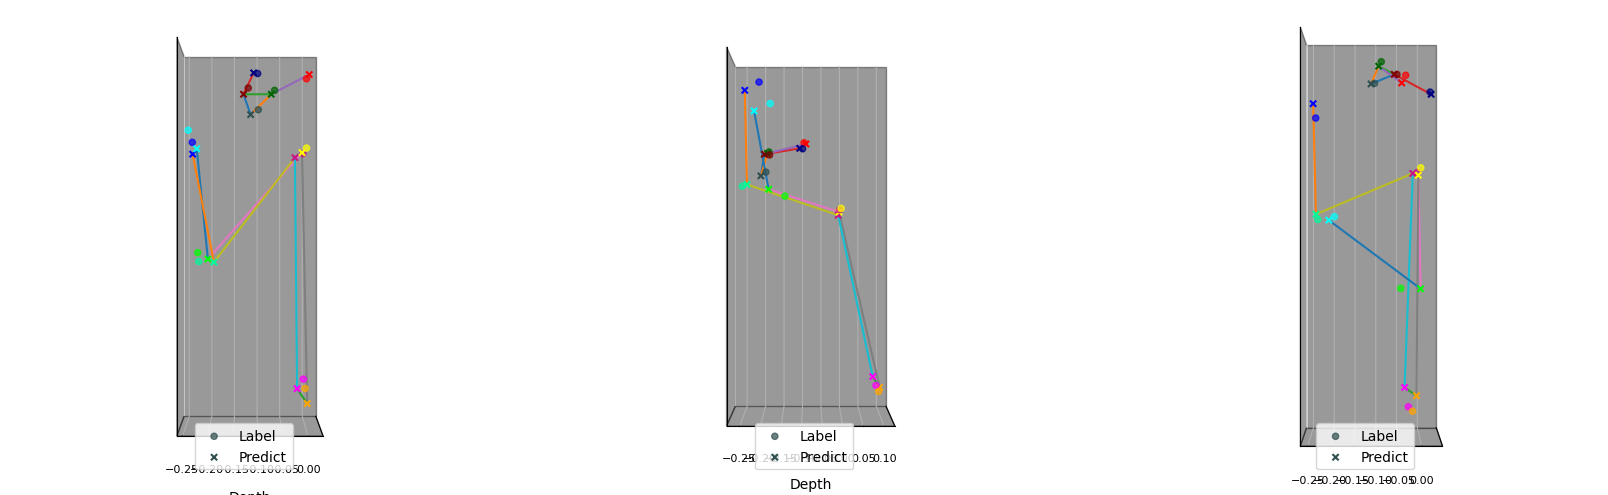

In [4]:
from modules.utils.visualization import (
    plot_samples
)
dataset_length = len(experiment.test_loader.dataset)
plot_samples(
    synthetic_cabin_ir_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)